# Importing the used Libraries

In [1]:
# import matplotlib as mlp
import scipy
import numpy as np
import sympy
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from sklearn.preprocessing import scale
from scipy.stats.stats import pearsonr 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Importing the dataset

#### Importing the 3 csv files which are provided : properties_2016.csv, train_2016_v2.csv and sample_submission.csv.

In [2]:
import pandas as pd
properties_data = pd.read_csv("properties_2016.csv", 
                          error_bad_lines=False, index_col=False, dtype='unicode', low_memory=False)

train_data = pd.read_csv("train_2016_v2.csv", 
                          error_bad_lines=False, index_col=False, dtype='unicode', low_memory=False)

test_data = pd.read_csv("sample_submission.csv", 
                          error_bad_lines=False, index_col=False, dtype='unicode', low_memory=False)

In [3]:
# Columns in the dataframe
properties_data.columns

Index(['parcelid', 'airconditioningtypeid', 'architecturalstyletypeid',
       'basementsqft', 'bathroomcnt', 'bedroomcnt', 'buildingclasstypeid',
       'buildingqualitytypeid', 'calculatedbathnbr', 'decktypeid',
       'finishedfloor1squarefeet', 'calculatedfinishedsquarefeet',
       'finishedsquarefeet12', 'finishedsquarefeet13', 'finishedsquarefeet15',
       'finishedsquarefeet50', 'finishedsquarefeet6', 'fips', 'fireplacecnt',
       'fullbathcnt', 'garagecarcnt', 'garagetotalsqft', 'hashottuborspa',
       'heatingorsystemtypeid', 'latitude', 'longitude', 'lotsizesquarefeet',
       'poolcnt', 'poolsizesum', 'pooltypeid10', 'pooltypeid2', 'pooltypeid7',
       'propertycountylandusecode', 'propertylandusetypeid',
       'propertyzoningdesc', 'rawcensustractandblock', 'regionidcity',
       'regionidcounty', 'regionidneighborhood', 'regionidzip', 'roomcnt',
       'storytypeid', 'threequarterbathnbr', 'typeconstructiontypeid',
       'unitcnt', 'yardbuildingsqft17', 'yardbuildin

In [4]:
# Shape of dataframe
properties_data.shape

(2985217, 58)

# Merging the training and test data with properties

In [5]:
# Renaming the dataset so that all the files have same name of the column
test_data= test_data.rename(columns={'ParcelId': 'parcelid'})

# Merging the dataset

zillow_data = train_data.merge(properties_data, how='left', on='parcelid') 
zillow_test = test_data.merge(properties_data, how='left', on='parcelid')

### Remove previos variables to keep some memory
del properties_data, train_data

# Cleaning and Data Format Conversion

In [6]:
# Checking the columns which are having string values and would not contribute to correlation.
# Dropping the columns off the dataset from both merged training and testing dataset
del zillow_data["propertycountylandusecode"]
del zillow_data["propertyzoningdesc"]
del zillow_data["taxdelinquencyflag"]

In [7]:
del zillow_test["propertycountylandusecode"]
del zillow_test["propertyzoningdesc"]
del zillow_test["taxdelinquencyflag"]

In [8]:
for column in zillow_data.columns:
    zillow_data[column] = pd.to_numeric(zillow_data[column], errors='coerce') 

In [9]:
for column in zillow_test.columns:
    zillow_test[column] = pd.to_numeric(zillow_test[column], errors='coerce') 

# Correlation between Interesting variables

In [10]:
import seaborn as sns
corr = zillow_data.corr(method = 'pearson')
corr.shape

(57, 57)

## Heatmap of all variables

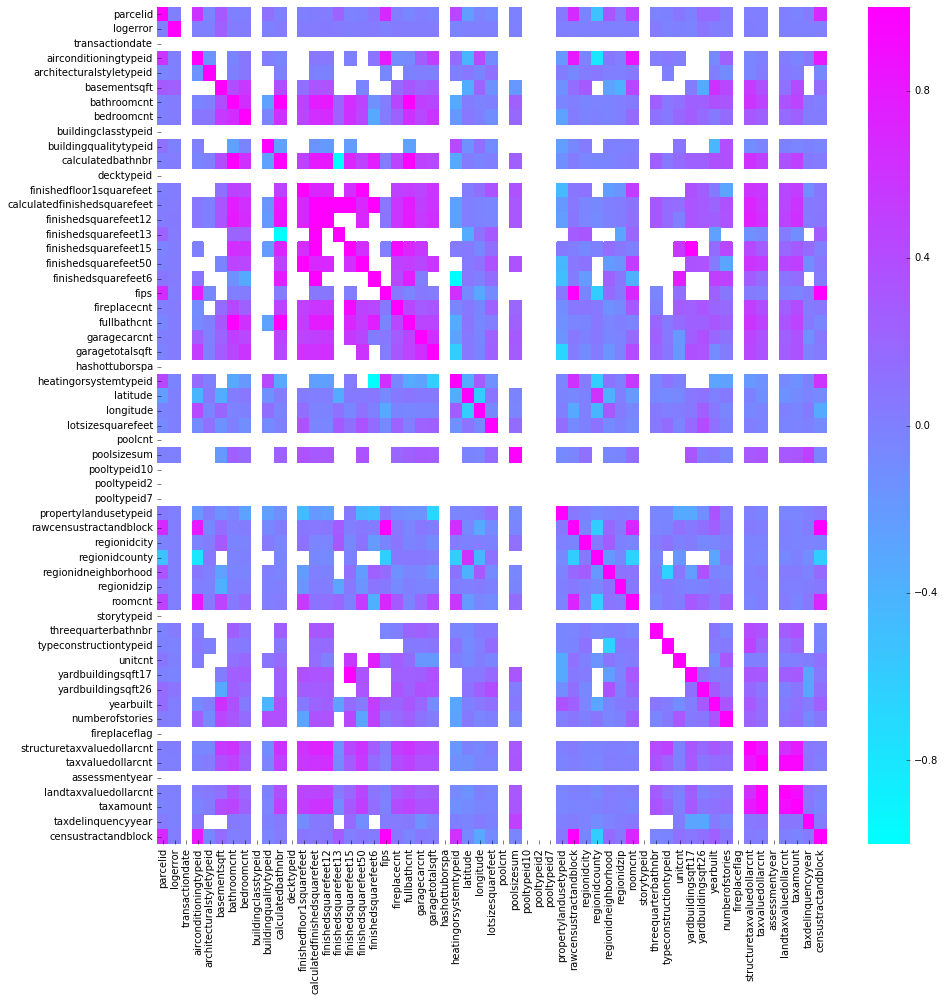

In [12]:
%matplotlib inline 
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns, cmap="cool", ax=ax)

#### HeatMap which shows correlation between interesting variables which should be correlated. I selected these 8 columns to find the correlation amongst them based.

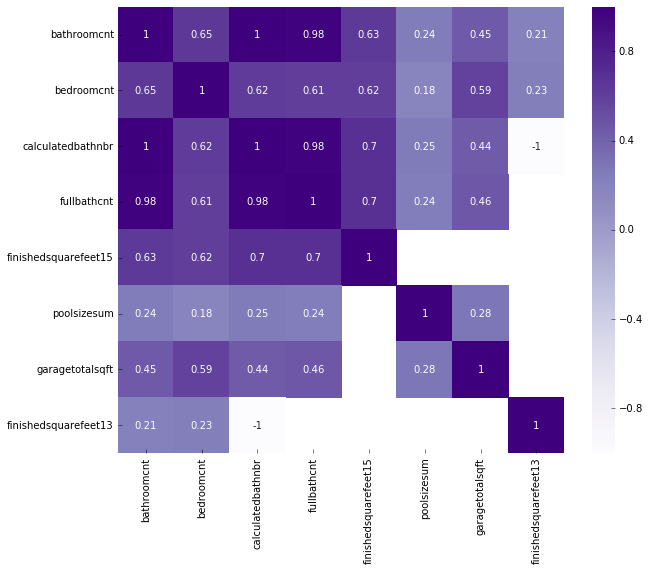

In [13]:
%matplotlib inline 
data_interesting = zillow_data[['bathroomcnt','bedroomcnt','calculatedbathnbr','fullbathcnt',
                                          'finishedsquarefeet15','poolsizesum','garagetotalsqft','finishedsquarefeet13']]
data_interesting_corr = data_interesting.corr(method = 'pearson')
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(data_interesting_corr, 
        xticklabels=data_interesting_corr.columns,
        yticklabels=data_interesting_corr.columns,  annot=True, cmap="Purples", ax=ax)

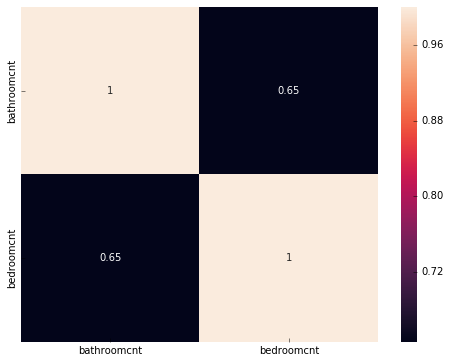

In [14]:
# HeatMap which shows correlation between 'bathroomcnt' and 'bedroomcnt'
data_bathroomcnt_bedroomcnt = zillow_data[['bathroomcnt','bedroomcnt']]
data_bathroomcnt_bedroomcnt_corr = data_bathroomcnt_bedroomcnt.corr(method = 'pearson')
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(data_bathroomcnt_bedroomcnt_corr, 
        xticklabels=data_bathroomcnt_bedroomcnt_corr.columns,
        yticklabels=data_bathroomcnt_bedroomcnt_corr.columns,  annot=True, ax=ax)

From the plot above, we see that the correlation between 'bathroomcnt' and 'bedroomcnt' is 0.65. This correlation can be easily
understood by the fact that the apartments with higher number of bedrooms usually have more bathrooms. eg : A 2BHK apartment 
usually have 2 bathrooms and a 1BHK usually consists of a single bathroom.

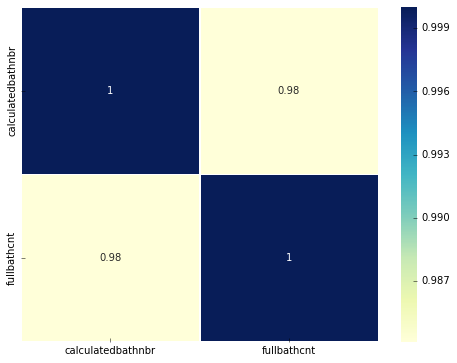

In [15]:
# HeatMap which shows correlation between 'calculatedbathnbr' and 'fullbathcnt'
data_calculatedbathnbr_fullbathcnt = zillow_data[['calculatedbathnbr','fullbathcnt']]
data_calculatedbathnbr_fullbathcnt_corr = data_calculatedbathnbr_fullbathcnt.corr(method = 'pearson')
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(data_calculatedbathnbr_fullbathcnt_corr, 
        xticklabels=data_calculatedbathnbr_fullbathcnt_corr.columns,
        yticklabels=data_calculatedbathnbr_fullbathcnt_corr.columns, annot = True, linewidths=.5, cmap="YlGnBu", ax=ax)

From the plot above, we see that the correlation between 'bathroomcnt' and 'bedroomcnt' is 0.98. This high correlation can be easily understood by the fact that as the number of bathrooms will increase, the total number of rooms including bathrooms and bedrooms in apartment will also increase.

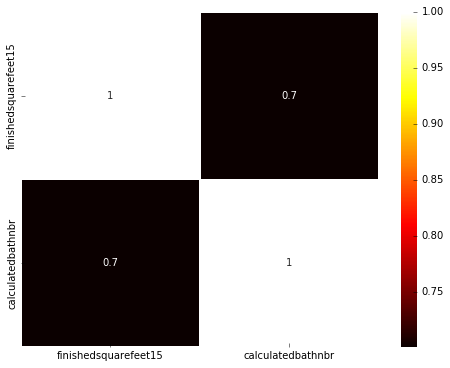

In [16]:
# HeatMap which shows correlation between 'finishedsquarefeet15' and 'calculatedbathnbr'
data_finishedsquarefeet15_poolsizesum  = zillow_data[['finishedsquarefeet15','calculatedbathnbr']]
data_finishedsquarefeet15_poolsizesum_corr = data_finishedsquarefeet15_poolsizesum.corr(method = 'pearson')
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(data_finishedsquarefeet15_poolsizesum_corr, 
        xticklabels=data_finishedsquarefeet15_poolsizesum_corr.columns,
        yticklabels=data_finishedsquarefeet15_poolsizesum_corr.columns, annot = True, linewidths=.5, cmap="hot", ax = ax)

Similary, we can see a direct correlation between above two variables.

# Other Informative Plots

We notice that there are a lot of NAN values which signifies that data is not available for that attribute.
Now, let us determine which attributes have the most data missing. Thid means that the data for these fields
is not available or does not exist. It may be possible that such information is very difficult to collect.
We can see that the basic information like bedroom count, latitude etc have very few NAN values.

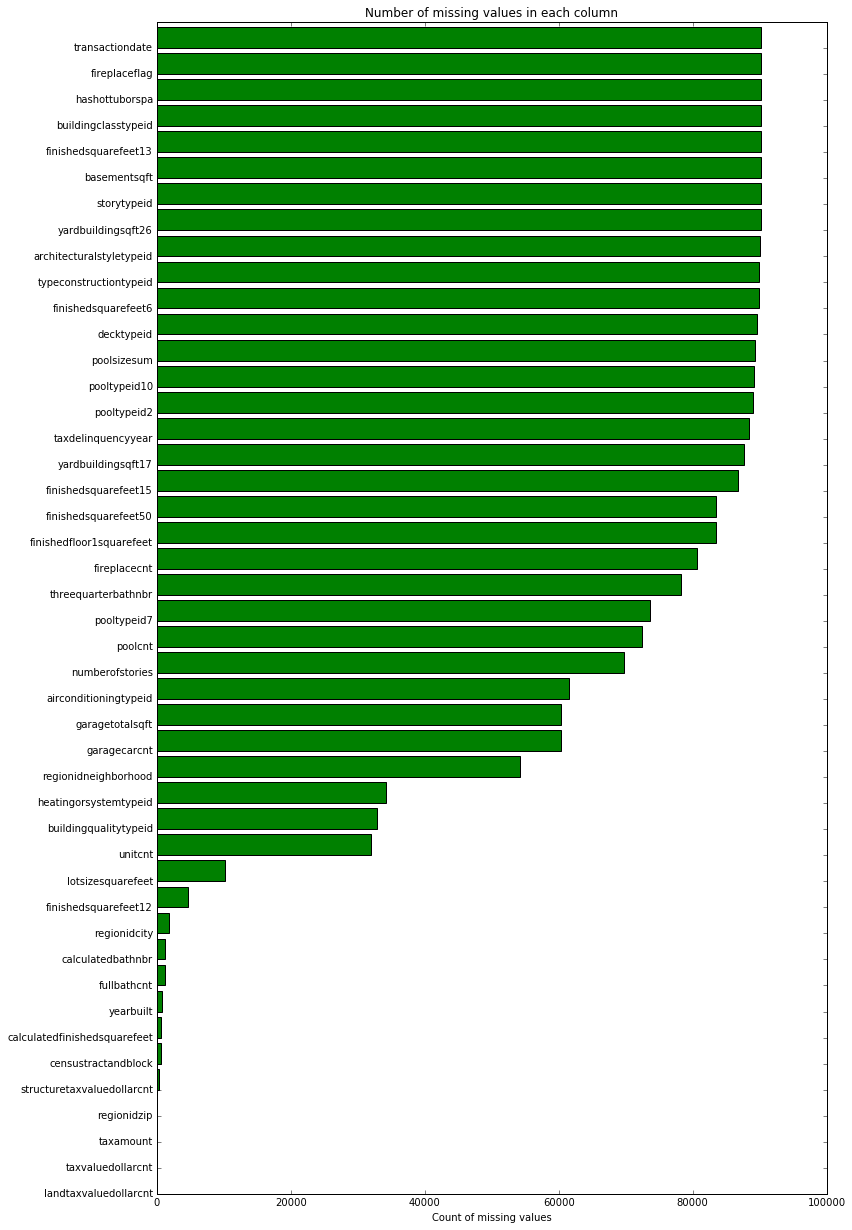

In [17]:
missing_data = zillow_data.isnull().sum(axis=0).reset_index()
missing_data.columns = ['column_name', 'missing_count']
missing_data = missing_data.ix[missing_data['missing_count']>0]
missing_data = missing_data.sort_values(by='missing_count')

ind = np.arange(missing_data.shape[0])
#width = 0.8
fig, ax = plt.subplots(figsize=(12,21))
rects = ax.barh(ind, missing_data.missing_count.values, color='green')
ax.set_yticks(ind)
ax.set_yticklabels(missing_data.column_name.values, rotation='horizontal', ha = 'right')
ax.set_xlabel("Count of missing values")
ax.set_title("Number of missing values in each column")
plt.show()

 From the analysis, it is clear that most of the apartments have either two, three or four bedrooms 
 and very few apartments have more than five bedrooms. There are also some apartments which have 0 bedrooms.

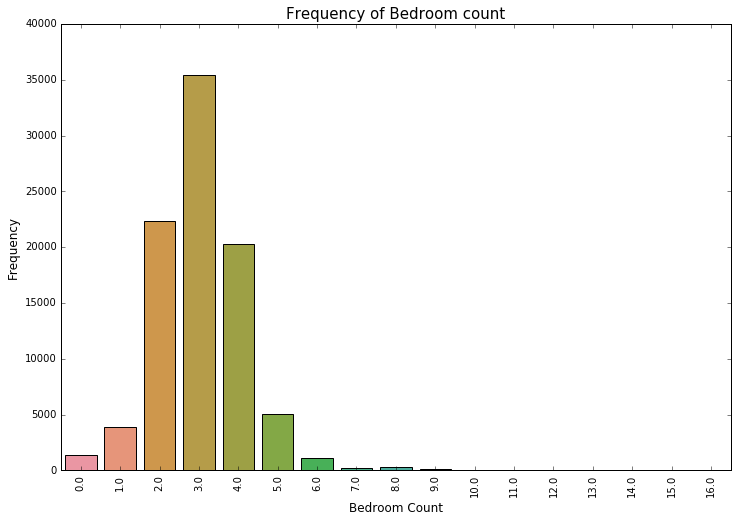

In [18]:
plt.figure(figsize=(12,8))
sns.countplot(x="bedroomcnt", data=zillow_data)
plt.ylabel('Frequency', fontsize=12)
plt.xlabel('Bedroom Count', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of Bedroom count", fontsize=15)
plt.show()

 From the Kaggle description, we are given that the real estates mentioned in the datasets are from three counties : 
 (Los Angeles, Orange and Ventura, California) and the data is of year 2016. This can be verified from the geo map below.

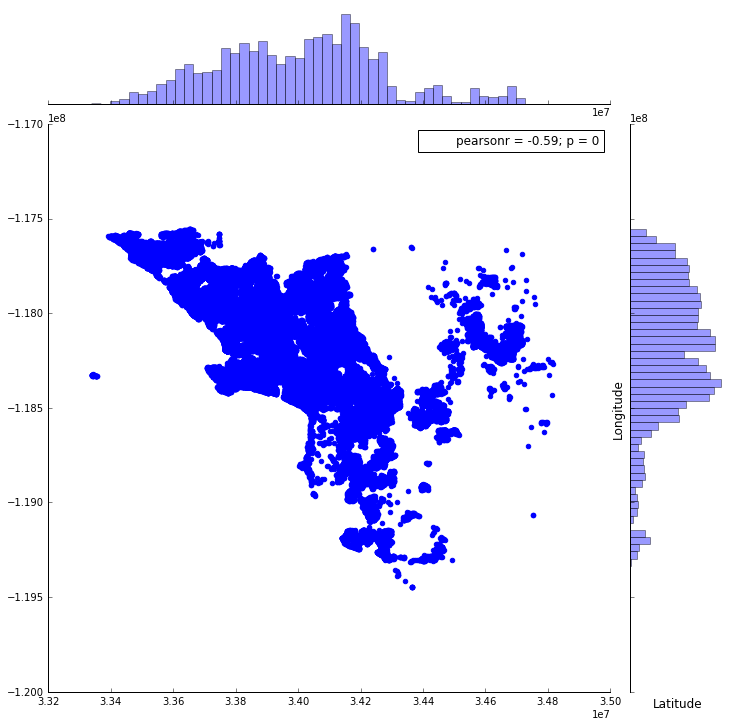

In [19]:
# The columns which determine the geographic properties
geocolumns = [  'latitude', 'longitude'
                            ,'propertylandusetypeid'
                            ,'regionidcity','regionidcounty', 'regionidneighborhood', 'regionidzip'
                            ,'censustractandblock', 'rawcensustractandblock']

geoproperties = zillow_data[geocolumns]
plt.figure(figsize=(12,12))

# Plotting a geo map using latitude and longitude values
sns.jointplot(x=zillow_data.latitude.values, y=zillow_data.longitude.values, size=10)
plt.ylabel('Longitude', fontsize=12)
plt.xlabel('Latitude', fontsize=12)
plt.show()

#### Tax value count of 2 BHK apartments yearwise 

The below line chart clearly points towards the increasing taxes over the years. There has been a tremendous rise
in the tax value in the 20th century.

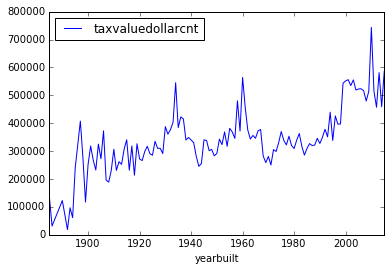

In [20]:
fig = plt.figure(figsize=(12,5))
# Average price of 2 BHK Apartments over the years
taxvaluedollarcnt_BHK_yearwise = pd.DataFrame({'taxvaluedollarcnt' : zillow_data.groupby(["bedroomcnt", "yearbuilt"]).taxvaluedollarcnt.mean()}).reset_index()
taxvaluedollarcnt_2BHK_yearwise = taxvaluedollarcnt_BHK_yearwise[taxvaluedollarcnt_BHK_yearwise['bedroomcnt'] == 2]
taxvaluedollarcnt_2BHK_yearwise.plot(x='yearbuilt', y='taxvaluedollarcnt')

The scatterplot below is very distinct and thus you cannot get much idea from the data the data. However, most of the apartments 
or enteries have both bed room count and bathroom count less than 5.

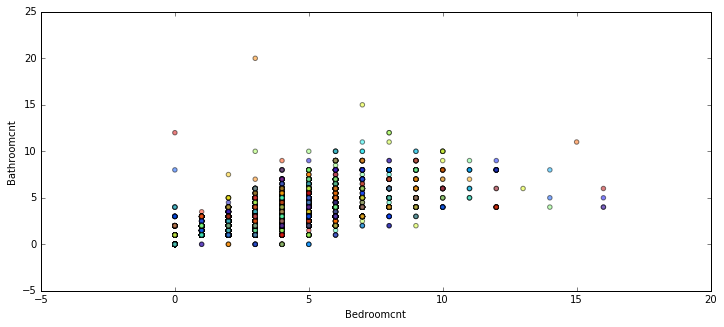

In [21]:
x = np.array(zillow_data['bedroomcnt'])
y = np.array(zillow_data['bathroomcnt'])
fig = plt.figure(figsize=(12,5))
colors = np.random.rand(len(zillow_data))
plt.scatter(x, y, c=colors, alpha=0.5)
plt.xlabel("Bedroomcnt")
plt.ylabel("Bathroomcnt")
plt.show()

The below line charts gives an idea about the increasing price of apartment over the years. However, there was a recent fall
in the prices due to recession. The first line chart is for 2 bedroom apartments and the second is for 3 bedroom apartments. The trend is almost same for both of them.

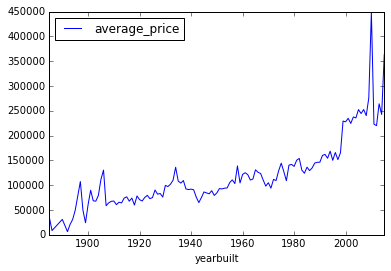

In [22]:
# Average price of 2 BHK Apartments over the years
avg_price_BHK_yearwise = pd.DataFrame({'average_price' : zillow_data.groupby(["bedroomcnt", "yearbuilt"]).structuretaxvaluedollarcnt.mean()}).reset_index()
avg_price_2BHK_yearwise = avg_price_BHK_yearwise[avg_price_BHK_yearwise['bedroomcnt'] == 2]
avg_price_2BHK_yearwise.plot(x='yearbuilt', y='average_price')

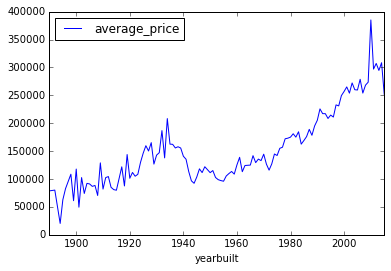

In [23]:
# Average price of 3BHK apartment over the years
avg_price_BHK_yearwise = pd.DataFrame({'average_price' : zillow_data.groupby(["bedroomcnt", "yearbuilt"]).structuretaxvaluedollarcnt.mean()}).reset_index()
avg_price_2BHK_yearwise = avg_price_BHK_yearwise[avg_price_BHK_yearwise['bedroomcnt'] == 3]
avg_price_2BHK_yearwise.plot(x='yearbuilt', y='average_price')

Scatterplot between taxvaluedollarcount and taxamount

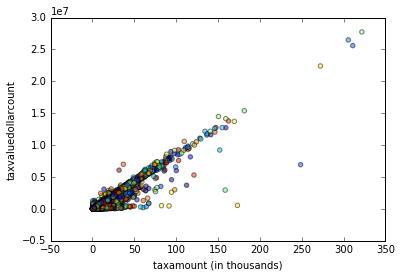

In [24]:
x = np.float32(zillow_data['taxamount']/1000)
y = np.float32(zillow_data['taxvaluedollarcnt'])
colors = np.random.rand(len(zillow_data))
plt.scatter(x, y, c=colors, alpha=0.5)
plt.xlabel("taxamount (in thousands)")
plt.ylabel("taxvaluedollarcount")
plt.show()

# Linear Regression Model

In [25]:
from sklearn import linear_model

x_train = zillow_data[['bathroomcnt','bedroomcnt','calculatedbathnbr','fullbathcnt',
                                          'finishedsquarefeet15','poolsizesum','garagetotalsqft','finishedsquarefeet13']]
y_train = zillow_data['logerror']

x_train = x_train.fillna(x_train.mean())

In [26]:
# Create linear regression object
regr = linear_model.LinearRegression()

In [27]:
# Train the model using the training sets
regr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [28]:
test_interesting = zillow_test[['bathroomcnt','bedroomcnt','calculatedbathnbr','fullbathcnt',
                                          'finishedsquarefeet15','poolsizesum','garagetotalsqft','finishedsquarefeet13']]

In [29]:
test_interesting = test_interesting.fillna(test_interesting.mean())

# Customized Predicton model

In [30]:
from sklearn import preprocessing
# Using a scalar for preprocessing
x_scaled = preprocessing.scale(x_train)
scaler = preprocessing.StandardScaler().fit(x_train)
scaler.transform(x_train) 

# Using Random Forest Regressor 
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(max_depth=2, random_state=0)
rf.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=2,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=0,
           verbose=0, warm_start=False)

# Prediction using Models

In [31]:
zillow_pred = regr.predict(test_interesting)
sample_file = pd.read_csv('sample_submission.csv') 
for c in sample_file.columns[sample_file.columns != 'ParcelId']:
    sample_file[c] = zillow_pred
sample_file.to_csv('linearRegression_predicted_results.csv', index=False, float_format='%.4f')

# This file gave a public score of 0.0672694

In [32]:
zillow_pred = rf.predict(test_interesting)
sample_file = pd.read_csv('sample_submission.csv') 
for c in sample_file.columns[sample_file.columns != 'ParcelId']:
    sample_file[c] = zillow_pred
sample_file.to_csv('RandomForest_predicted_results.csv', index=False, float_format='%.4f')

# This file gave a public score of 0.0650277